In [1]:
#import the significant gene list and digital spot coordinates
import csv
from matplotlib import pyplot as plt
import os
import numpy as np

geneList = []
with open(os.path.join('/','home','zjpeters','Documents','visiumalignment','derivatives','listOfSigSleepDepGenes20230104-114729.csv'), newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    next(csvreader)
    for row in csvreader:
        #print(row[0])
        # checks for in tissue spots
        geneList.append(row[0])

tissuePositionsList = []
with open(os.path.join('/','home','zjpeters','Documents','visiumalignment','derivatives','digitalSpotCoordinates.csv'), newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    next(csvreader)
    for row in csvreader:
        #print(row)
        # checks for in tissue spots
        tissuePositionsList.append(row)
            
tissuePositionsList = np.array(tissuePositionsList, dtype=float)
tissuePositionsList[:,[0,1]] = tissuePositionsList[:,[1,0]]
tissuePositionsList = np.delete(tissuePositionsList, [2,3,4,5],1)



In [2]:
def showGenePValueResults(geneName):
    geneIndex = geneList.index(geneName)
    actPvals = []
    with open(os.path.join('/','home','zjpeters','Documents','visiumalignment','derivatives','listOfSigSleepDepGenes20230104-084640.csv'), newline='') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            if row[0] == geneName:
                actPvals = np.array(row[2:], dtype=float)
                print('Gene name: ' + geneName + ", number of significant spots: " + row[1])
                plt.scatter(tissuePositionsList[:,0],tissuePositionsList[:,1], c=actPvals, cmap='Reds_r',marker='.')
                
                activeData = plt.gca()
                activeData.set_aspect('equal','box')
                activeData.invert_yaxis()
                plt.title("p-values for: " + geneName)
                plt.show()
    
    return 

In [3]:
def showGeneTStatisticResults(geneName):
    geneIndex = geneList.index(geneName)
    actPvals = []
    with open(os.path.join('/','home','zjpeters','Documents','visiumalignment','derivatives','listOfSigSleepDepGenesTstatistics20230104-135828.csv'), newline='') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            if row[0] == geneName:
                actPvals = np.array(row[2:], dtype=float)
                print('Gene name: ' + geneName + ", number of significant spots: " + row[1])
                plt.scatter(tissuePositionsList[:,0],tissuePositionsList[:,1], c=actPvals, cmap='seismic',vmin=-4, vmax=4,marker='.')
                
                activeData = plt.gca()
                activeData.set_aspect('equal','box')
                activeData.invert_yaxis()
                plt.title("T-statistics for: " + geneName)
                plt.show()
    return 


Gene name: Egr1, number of significant spots: 318


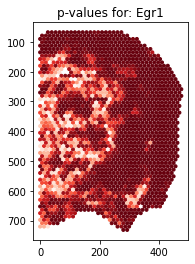

Gene name: Egr1, number of significant spots: 318


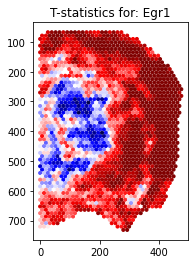

In [9]:
geneOfInterest = 'Egr1'
showGenePValueResults(geneOfInterest)
showGeneTStatisticResults(geneOfInterest)